#**UAS MATA KULIAH DEEP LEARNING**

## **SIAbot UNIB (Skripsi Informatika Assistant Universitas Bengkulu)**

**ANGGOTA KELOMPOK :**

**1.**   **RIMAYA DWI ATIKA (G1A021021)**

**2.**  **RAHAYU NINGRUM PUSPA RIDHA (G1A021071)**




## **Instalasi Library Pengenal Suara**

Pada proyek Chatbot kami ini akan menggunakan **Google Text To Speech** juga untuk outputnya.


In [1]:
!pip -q install speechrecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 17.4 MB/s eta 0:00:00


In [2]:
!pip -q install gtts

## **Mengimpor Pustaka Yang Dibutuhkan**

Library yang kami gunakan yaitu NumPy untuk komputasi matematika, Matplotlib untuk visualisasi model data, Natural Language Toolkit atau NLTK untuk pengolahan teks, Pandas untuk membaca data, serta Tensorflow untuk model pada data menggunakan algoritma LSTM (Long Short Term Memory).


In [3]:
# Kumpulan Pustaka

import json  # Library untuk bekerja dengan data JSON
import nltk  # Library untuk Natural Language Processing (NLP)
import time  # Library untuk pengukuran waktu
import random  # Library untuk menghasilkan angka acak
import string  # Library untuk operasi pada string
import pickle  # Library untuk serialisasi dan deserialisasi data Python
import numpy as np  # Library untuk operasi array dan komputasi numerik
import pandas as pd  # Library untuk manipulasi data berbasis tabel
from io import BytesIO  # Modul untuk operasi input/output berbasis byte
import tensorflow as tf  # Library untuk machine learning dan deep learning
import IPython.display as ipd  # Modul untuk menampilkan konten multimedia di Jupyter Notebook
import matplotlib.pyplot as plt  # Library untuk visualisasi data
from nltk.stem import WordNetLemmatizer  # Modul untuk lemmatization pada NLP
from tensorflow.keras.models import Model  # Modul untuk membangun model menggunakan Keras
from keras.utils import plot_model  # Modul untuk memvisualisasikan arsitektur model
from sklearn.preprocessing import LabelEncoder  # Modul untuk mengkodekan label target
from tensorflow.keras.preprocessing.text import Tokenizer  # Modul untuk tokenisasi teks
from tensorflow.keras.layers import Input, Embedding, LSTM  # Layer yang digunakan untuk membangun model
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Modul untuk padding sequence teks
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPool1D  # Layer tambahan untuk model

## **Download Paket NLTK**

In [4]:
# Paket untuk tokenisasi kalimat
nltk.download('punkt')
# Download the 'punkt_tab' package untuk sentence tokenization.
nltk.download('punkt_tab')
# Paket untuk lemmatization
nltk.download('wordnet')
# Paket data WordNet multibahasa
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## **Memuat Kumpulan Data Json**

Data Json merupakan data yang termasuk dalam *semi structured* yang dimana data ini menampung beberapa bagian data seperti **tag**, **pattern**, **context**, dan **response**. Data yang dipakai dalam proyek ini menggunakan dataset manual yang kami hasilkan dari <b>Buku Panduan Skripsi Informatika UNIB</b> dan beberapa informasi umum.

In [5]:
# Importing the dataset
with open('/content/SIAbot_UNIB.json', encoding='utf-8') as content:
  data1 = json.load(content)

# Mendapatkan semua data ke dalam list
tags = [] # data tag
inputs = [] # data input atau pattern
responses = {} # data respon
words = [] # Data kata
classes = [] # Data Kelas atau Tag
documents = [] # Data Kalimat Dokumen
ignore_words = ['?', '!'] # Mengabaikan tanda spesial karakter
# Tambahkan data intents dalam json
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    # digunakan untuk pattern atau teks pertanyaan dalam json
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      # tambahkan ke dalam list kelas dalam data
      if intent['tag'] not in classes:
        classes.append(intent['tag'])

# Konversi data json ke dalam dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags})

In [6]:
# Cetak data keseluruhan
data

patterns       tags
0                hai  greetings
1               halo  greetings
2              hallo  greetings
3                 hy  greetings
4                 hi  greetings
..               ...        ...
97      Sampai jumpa    goodbye
98               Bye    goodbye
99   Selamat tinggal    goodbye
100    Sudah selesai    goodbye
101     Saya selesai    goodbye

[102 rows x 2 columns]

In [7]:
# Cetak data baris pertama sampai baris kelima
data.head()

patterns       tags
0      hai  greetings
1     halo  greetings
2    hallo  greetings
3       hy  greetings
4       hi  greetings

In [8]:
# Cetak data baris akhir
data.tail()

patterns     tags
97      Sampai jumpa  goodbye
98               Bye  goodbye
99   Selamat tinggal  goodbye
100    Sudah selesai  goodbye
101     Saya selesai  goodbye

## **Remove Punctuations**

Tahapan praproses pada data teks yang pertama adalah menghapus punktuasi atau tanda baca seperti *special character* yaitu **'!'** (**tanda seru**) **','** (**tanda koma**) **'.'** (**tanda titik sebagai berhenti**) '**?**' (**tanda tanya**) dan tanda baca yang lain.

In [9]:
# Removing Punctuations (Menghilangkan Punktuasi) atau tanda baca seperti special character yaitu ! , ? dan tanda baca yang lain. Tahapan ini gunanya untuk mempermudah pemrosesan data teks yang akan kita olah.
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

## **Lemmatization (Lematisasi)**

Lematisasi atau *Lemmatization* adalah proses dimana merujuk pada melakukan sesuatu menggunakan vocabulary atau kosakata dan analisis morfologi kata-kata untuk menghilangkan *inflectional endings only*

In [10]:
# Membuat objek lemmatizer untuk proses lemmatization
lemmatizer = WordNetLemmatizer()

# Melakukan lemmatization pada setiap kata dalam list 'words'
# Kata-kata dikonversi ke huruf kecil dan dihapus jika ada dalam 'ignore_words'
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]

# Mengurutkan kata-kata unik setelah proses lemmatization dan menghapus duplikat
words = sorted(list(set(words)))

# Mencetak jumlah kata unik yang telah melalui proses lemmatization beserta daftar katanya
print(len(words), "kata unik setelah lemmatization", words)


150 kata unik setelah lemmatization ["'s", 'ada', 'administrasi', 'administrasinya', 'afternoon', 'alur', 'apa', 'apakah', 'aturan', 'bagaimana', 'bahan', 'bengkulu', 'berapa', 'bimbingan', 'bisa', 'bro', 'bye', 'cara', 'cloud', 'computing', 'contoh', 'daftar', 'dalam', 'dan', 'dari', 'dataset', 'di', 'dibahas', 'diberikan', 'dihubungi', 'dilakukan', 'dinilai', 'diperlukan', 'dokumen', 'efektif', 'evening', 'format', 'good', 'hai', 'hallo', 'halo', 'hi', 'hy', 'ide', 'ilmiah', 'indikator', 'informasi', 'informatika', 'itu', 'jadwal', 'jalur', 'jelaskan', 'jika', 'judul', 'jumpa', 'jurnal', 'kasih', 'kawan', 'kendala', 'ketentuan', 'keuntungan', 'kkni', "kon'nichiwa", 'kontak', 'kriteria', 'kualifikasi', 'lampiran', 'lampiran-lampiran', 'langkah', 'langkah-langkah', 'learning', 'lulu', 'lulusan', 'machine', 'malam', 'mana', 'masalah', 'membantu', 'memilih', 'menarik', 'mencari', 'mendapatkan', 'mengambil', 'menghubungi', 'menyelesaikan', 'minta', 'morning', 'naskah', 'new', 'night', 'ni

In [11]:
# sorting pada data class
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)

26 classes ['alur_publikasi', 'alur_sidang_skripsi', 'alur_skripsi', 'bimbingan_skripsi', 'format_penulisan', 'goodbye', 'greetings', 'jalur_publikasi_ilmiah', 'kontak_informasi', 'kriteria_penilaian', 'kualifikasi_kkni', 'lampiran_skripsi', 'parameter_penilaian', 'penulisan_dapus', 'penyelesaian_masalah', 'persyaratan_administrasi1', 'persyaratan_administrasi2', 'persyaratan_akademik', 'proses_skripsi_reguler', 'rekomendasi_judul', 'rekomendasi_judul_cloud_computing', 'rekomendasi_judul_machine_learning', 'sistematika_penulisan', 'sumber_penelitian', 'tempat_mencari_dataset', 'topik_skripsi']


In [12]:
# Mencari jumlah keseluruhan data teks atau kombinasi antara data pattern dengan data tag dalam intents json
print (len(documents), "documents")

688 documents


## **Tokenization (Tokenisasi)**

Tokenisasi merupakan tugas untuk memecah kalimat menjadi bagian-bagian yang disebut dengan '**Token**' dan menghilangkan bagian tertentu seperti tanda baca.

In [13]:
# Tokenize the data (Tokenisasi Data)
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
train

[[64],
 [65],
 [66],
 [67],
 [38],
 [39],
 [68],
 [69],
 [70],
 [19, 39],
 [19, 71],
 [19, 72],
 [19, 73],
 [74],
 [75],
 [76],
 [77],
 [78, 79],
 [80],
 [38, 81],
 [3, 40, 15, 1],
 [40, 15, 1, 3],
 [2, 5, 12, 15, 1],
 [82, 15, 1],
 [83, 16, 32, 84, 15, 1],
 [2, 5, 32, 85, 1],
 [2, 5, 12, 41],
 [42, 12, 41],
 [2, 5, 12, 33, 4, 1, 17],
 [3, 12, 6, 7, 8, 14],
 [42, 12, 33, 86, 7, 8],
 [2, 5, 12, 33, 4, 1, 7, 8],
 [3, 34, 18, 1],
 [43, 34, 18, 1],
 [2, 5, 43, 87, 1],
 [3, 20, 21, 1],
 [88, 21, 1],
 [2, 6, 89, 90, 21, 1],
 [3, 22, 91, 92, 21, 1],
 [2, 44, 7, 8, 14],
 [3, 20, 1, 7, 8, 14],
 [2, 32, 7, 8, 14],
 [93, 7, 8, 14],
 [3, 20, 1, 7, 8],
 [2, 45, 7, 8, 14],
 [3, 22, 46, 7, 8],
 [2, 5, 11, 1, 6, 94],
 [3, 46, 11, 1, 9],
 [11, 1, 9],
 [3, 1, 95],
 [2, 5, 96, 35, 1],
 [35, 4, 7, 17, 97, 8],
 [3, 47, 35, 98],
 [99, 47, 100, 6, 101, 4, 1, 9, 102],
 [2, 5, 103, 18, 48, 1],
 [3, 104, 105, 48, 1],
 [3, 34, 18, 49, 106],
 [2, 107, 18, 49, 108],
 [2, 44, 50, 51],
 [3, 50, 109, 9],
 [2, 110, 51

## **Memberi Padding**

Padding adalah proses untuk membuat setiap kalimat pada teks memiliki panjang yang seragam.

In [14]:
# Melakukan proses padding pada data
x_train = pad_sequences(train)
# Menampilkan hasil padding
print(x_train)

[[  0   0   0   0   0   0   0   0  64]
 [  0   0   0   0   0   0   0   0  65]
 [  0   0   0   0   0   0   0   0  66]
 [  0   0   0   0   0   0   0   0  67]
 [  0   0   0   0   0   0   0   0  38]
 [  0   0   0   0   0   0   0   0  39]
 [  0   0   0   0   0   0   0   0  68]
 [  0   0   0   0   0   0   0   0  69]
 [  0   0   0   0   0   0   0   0  70]
 [  0   0   0   0   0   0   0  19  39]
 [  0   0   0   0   0   0   0  19  71]
 [  0   0   0   0   0   0   0  19  72]
 [  0   0   0   0   0   0   0  19  73]
 [  0   0   0   0   0   0   0   0  74]
 [  0   0   0   0   0   0   0   0  75]
 [  0   0   0   0   0   0   0   0  76]
 [  0   0   0   0   0   0   0   0  77]
 [  0   0   0   0   0   0   0  78  79]
 [  0   0   0   0   0   0   0   0  80]
 [  0   0   0   0   0   0   0  38  81]
 [  0   0   0   0   0   3  40  15   1]
 [  0   0   0   0   0  40  15   1   3]
 [  0   0   0   0   2   5  12  15   1]
 [  0   0   0   0   0   0  82  15   1]
 [  0   0   0  83  16  32  84  15   1]
 [  0   0   0   0   2   5

## **Encoding Text**

Encoding merupakan suatu konversi atau pengkodean yang dimana data kategorik seperti huruf atau data teks menjadi data numerik atau angka menyesuaikan dengan data label yang digunakan. Tujuan dari encoding ini adalah mempermudah saat proses komputasi data teks dan modelling.

In [15]:
# Melakukan konversi data label tags dengan encoding
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])
print(y_train)

[ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  2  2 17 17
 17 17 15 15 15 16 16 16  4  4  4  1  1  1  1  7  7  7  7  0  0  0 25 25
 25  9  9  9 12 12 22 22 13 13 10 10 10 14 14 14 18 18 18 11 11 11 19 19
 19 21 21 21 21 20 20 20 20  3  3  3  3 23 23 23 23 24 24 24 24  8  8  8
  5  5  5  5  5  5]


## **Melihat Panjang Masukan, Panjang Keluaran dan Kosakata**

In [16]:
# Melihat hasil input pada data teks
input_shape = x_train.shape[1]
print(input_shape)

9


In [17]:
# Melakukan definisi tiap kalimat dan kata pada data teks
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)

# Melakukan pemeriksaan pada data output label teks
output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique words :  149
output length:  26


## **Simpan Model Format Words & Classes**

In [18]:
# Simpan hasil pemrosesan teks dengan menggunakan pickle
pickle.dump(words, open('words.pkl','wb'))
pickle.dump(classes, open('classes.pkl','wb'))

## **Simpan Label Encoder & Tokenizer**

In [19]:
# Menyimpan objek LabelEncoder ke dalam file 'le.pkl' menggunakan pickle
# File disimpan dalam mode write-binary ('wb')
pickle.dump(le, open('le.pkl', 'wb'))

# Menyimpan objek Tokenizer ke dalam file 'tokenizers.pkl' menggunakan pickle
# File disimpan dalam mode write-binary ('wb')
pickle.dump(tokenizer, open('tokenizers.pkl', 'wb'))

## **Membuat Model LSTM (Long Short Memory)**

**LSTM (Long Short Term Memory)** merupakan algoritma Deep Learning yang populer dan cocok digunakan untuk membuat prediksi dan klasifikasi yang berhubungan dengan waktu dan data teks.

In [20]:
# Membuat model (Modeling)
i = Input(shape=(input_shape,))  # Layer input untuk menerima data dengan bentuk 'input_shape'
x = Embedding(vocabulary+1, 10)(i)  # Layer embedding untuk merepresentasikan kata dalam bentuk vektor berdimensi 10
x = LSTM(10, return_sequences=True, recurrent_dropout=0.2)(x)  # Layer LSTM dengan 10 unit, output berupa urutan, dropout recurrent 20%
x = Flatten()(x)  # Layer flatten untuk meratakan output dari layer sebelumnya menjadi satu dimensi
x = Dense(output_length, activation="softmax")(x)  # Layer dense sebagai output, menggunakan fungsi aktivasi softmax
model = Model(i, x)  # Menyusun model dari layer input hingga output

# Kompilasi model
# Menggunakan 'sparse_categorical_crossentropy' sebagai fungsi loss, optimizer 'adam', dan metrik akurasi
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

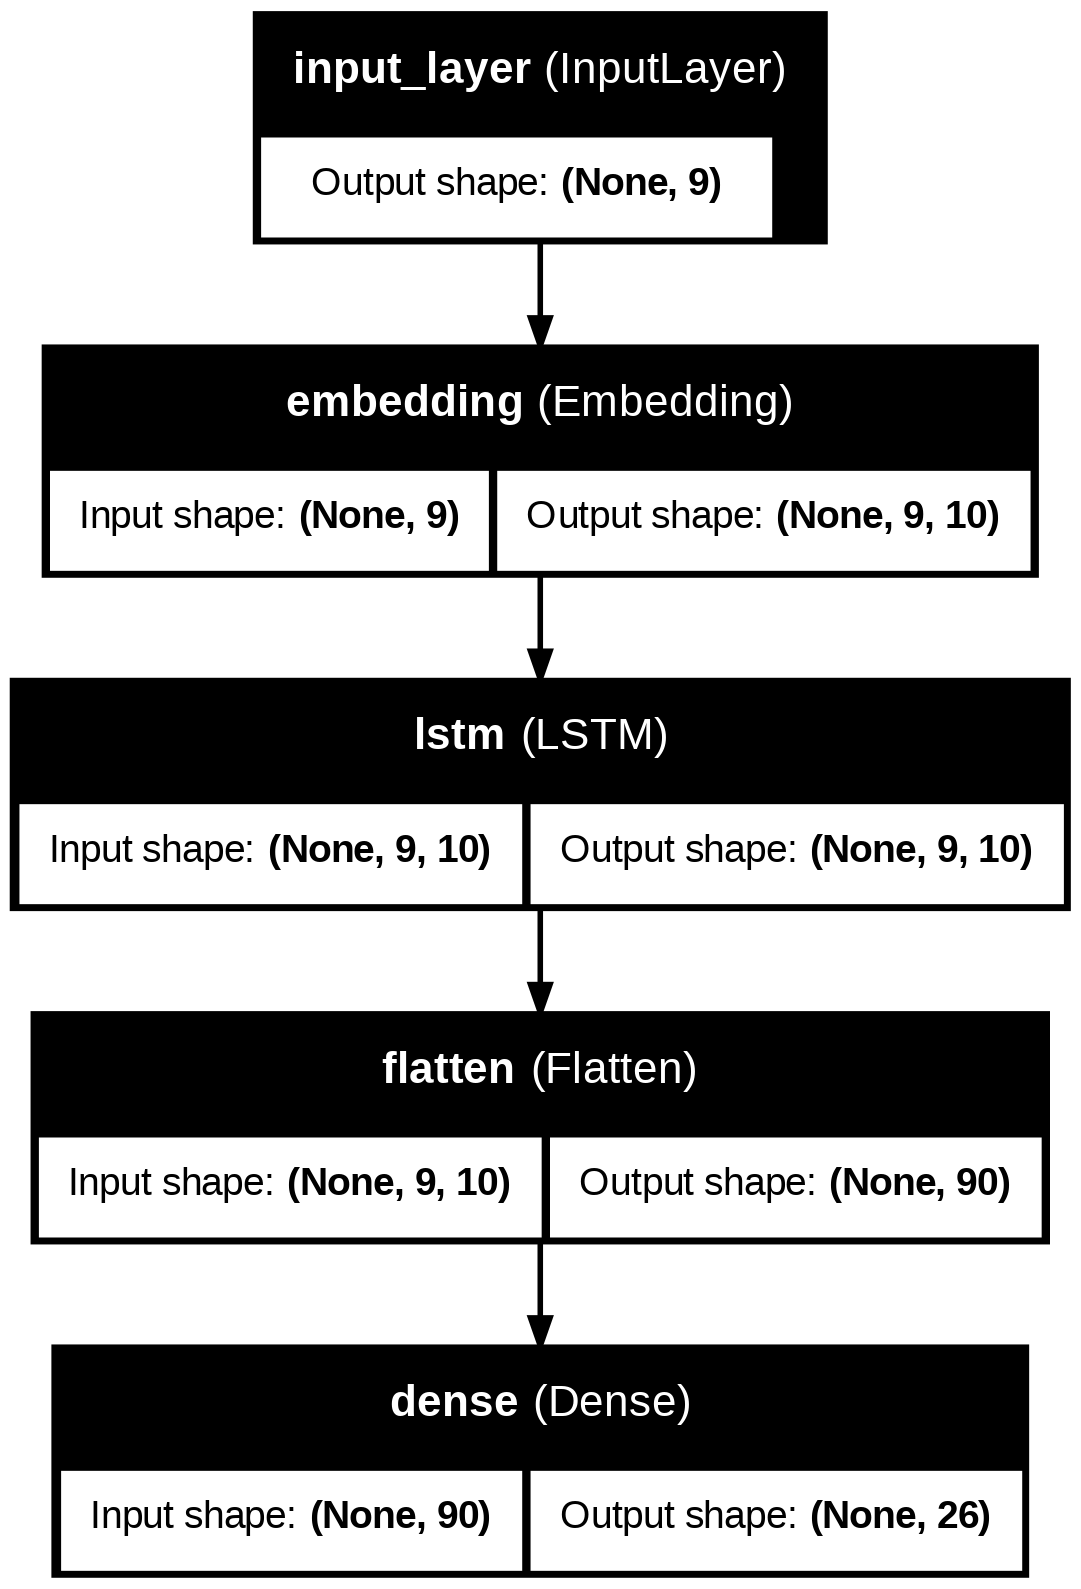

In [21]:
# Visualisasi Plot Arsitektur Model
# Membuat diagram arsitektur model dan menyimpannya sebagai file gambar 'model_plot.png'
# Parameter 'show_shapes=True' menampilkan bentuk (shape) setiap layer
# Parameter 'show_layer_names=True' menampilkan nama setiap layer dalam diagram

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [22]:
# Menampilkan parameter pada model LSTM
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 9)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 9, 10)               │           1,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 9, 10)               │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 90)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 26)                  │           2,366 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,706 (18.38 KB)

 Trainable params: 4,706 (18.38 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Training the model (Melatih model data sampai 450 kali)
train = model.fit(x_train, y_train, epochs=450)

Epoch 1/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.0290 - loss: 3.2564
Epoch 2/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2003 - loss: 3.2489
Epoch 3/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1586 - loss: 3.2436
Epoch 4/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1784 - loss: 3.2361
Epoch 5/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1972 - loss: 3.2244
Epoch 6/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2024 - loss: 3.2139
Epoch 7/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1878 - loss: 3.2014
Epoch 8/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2055 - loss: 3.1779
Epoch 9/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1836 - loss: 3.1692
Epoch 10/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1732 - loss: 3.1414
Epoch 11/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1930 - loss: 3.1032
Epoch 12/450
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2243 - lo

# **Evaluasi Model**

Setelah menjalankan pelatihan model dengan algoritma LSTM serta telah mengetahui hasil akurasi pada step terakhir. Maka, tahapan selanjutnya adalah menganalisa model dengan visualisasi plot akurasi dan loss untuk melihat hasil akurasi dari algoritma pelatihan model LSTM tersebut.

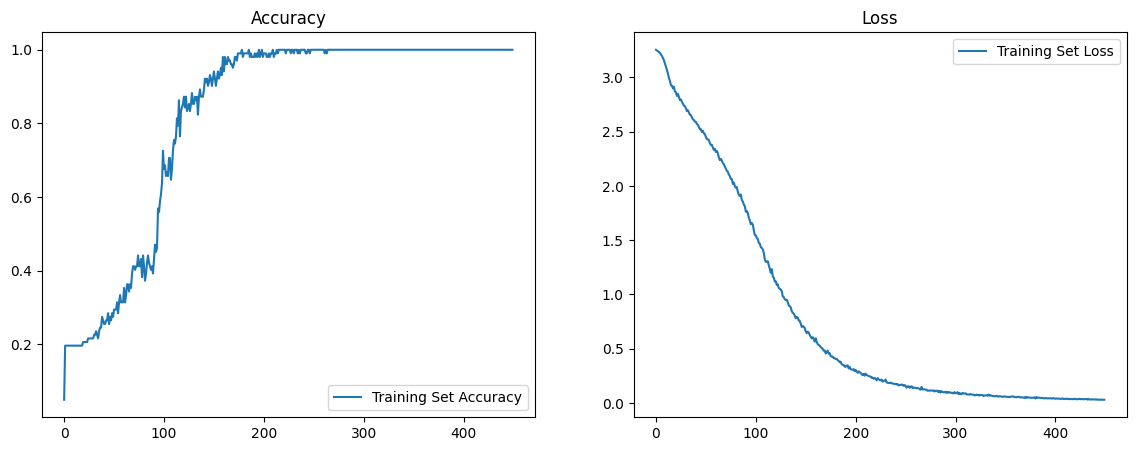

In [24]:
# Plotting model Accuracy and Loss (Visualisasi Plot Hasil Akurasi dan Loss)
# Plot Akurasi

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [25]:
pip install gTTS


## **Pengujian SIAbot UNIB**

Setelah mengetahui hasil dari akurasi dan loss pada model SIAbot UNIB yang telah dilatih dengan LSTM. Maka, tahapan selanjutnya adalah menguji atau testing pada chatbot yang telah dilatih sebelumnya dan melihat apakah sesuai atau tidak pada saat kita masukan teks kalimat pertanyaannya.

In [26]:
# Membuat Input Chat
from gtts import gTTS
import IPython.display as ipd

while True:
  texts_p = []
  prediction_input = input('👩‍🦰 Anda : ')

  # Menghapus punktuasi atau tanda baca dan konversi ke huruf kecil
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  # Melakukan Tokenisasi dan Padding pada data teks
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  # Konversi data teks menjadi array
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  # Mendapatkan hasil prediksi keluaran pada model
  output = model.predict(prediction_input)
  output = output.argmax()

  # Menemukan respon sesuai data tag dan memainkan suara bot
  response_tag = le.inverse_transform([output])[0]
  # Bot akan melakukan random jawaban percakapan dari hasil pertanyaan
  print("🤖 SIAbot_UNIB : ", random.choice(responses[response_tag]))
  # Tambahkan suara bot dengan Google Text to Speech
  tts = gTTS(random.choice(responses[response_tag]), lang='id')
  # Simpan model voice bot ke dalam Google Drive dengan format .wav
  tts.save('SIAbot_UNIB.wav')
  # Atur waktu jeda sampai 5 detik
  time.sleep(0.05)
  # Ambil file model yang telah disimpan sebelumnya
  ipd.display(ipd.Audio('/content/SIAbot_UNIB.wav', autoplay=False))
  print("="*60 + "\n")
  # Tambahkan respon 'goodbye' agar bot bisa berhenti melakukan percakapan
  if response_tag == "goodbye":
    break

👩‍🦰 Anda : hallo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
🤖 SIAbot_UNIB :  Hi, Ada yang bisa Skripsi Informatika Assistant (SIA) UNIB bantu?



👩‍🦰 Anda : Bagaimana alur pengambilan skripsi?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
🤖 SIAbot_UNIB :  
                Berikut adalah alur dalam pengambilan mata kuliah skripsi:
 
                1. Mengambil Mata Kuliah Skripsi

                2. Membuat Proposal Skripsi

                3. Seminar Proposal Skripsi

                4. Penelitian dan Penulisan Skripsi

                5. Seminar Hasil Skripsi

                6. Sidang Skripsi
                



👩‍🦰 Anda : Apa saja persyaratan pengambilan skripsi?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
🤖 SIAbot_UNIB :  Mahasiswa yang mengambil skema skripsi sebagai tugas akhir harus memenuhi persyaratan akademik berikut:
1. Terdaftar sebagai mahasiswa aktif pada Program Studi Informatika Fakultas Teknik Universitas Bengkulu.
2. Telah menyelesaikan Mata Kuliah Metodologi Penelitian (minimal semester 5) dan Lulus dengan minimum Nilai C.
3. Memiliki Indeks Prestasi Kumulatif (IPK) minimum yang dipersyaratkan yaitu 2.75. Jumlah minimum Sistem Kredit Semester (SKS) yang sudah diambil berjumlah 120 SKS.
4. Sedang dan sudah mengambil mata kuliah konsentrasi minimal 12 (dua belas) sks dengan rincian 9 (Sembilan) sks harus sesuai dengan topik skripsi yang diambil, dibuktikan dengan print-out KHS nilai dan KRS pada semester berjalan.
Selain persyaratan umum, mahasiswa juga harus memenuhi persyaratan-persyaratan administrasi



👩‍🦰 Anda : Apa saja persyaratan administrasi untuk skripsi reguler?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
🤖 SIAbot_UNIB :  Persyaratan-persyaratan administrasi untuk alur Skripsi Reguler yaitu sebagai berikut:
A. Seminar Proposal
1. Mengisi dan menyerahkan formulir pendaftaran Seminar Proposal.
2. Melampirkan proposal penelitian yang sudah disetujui/direview oleh minimal 1 dosen reviewer.
3. Menyertakan surat persetujuan dari dosen pembimbing.
4. Melampirkan bukti cover dan halaman pengesahan Kerja Praktek yang sudah ditandatangani oleh dosen pembimbing, penguji, dan koordinator program studi.
5. Mengumpulkan berkas-berkas administrasi ke bagian akademik program studi.
B. Seminar Hasil
1. Mengisi dan menyerahkan formulir pendaftaran Seminar Hasil.
2. Menyertakan laporan hasil penelitian yang sudah disetujui oleh dosen pembimbing.
3. Menyertakan surat persetujuan dari dosen pembimbing.
4. Melampirkan bukti telah mengikuti minimal 10 seminar hasil sebagai peserta (dibuktikan dengan kart


👩‍🦰 Anda : Bagaimana persyaratan yang jalur publikasi ilmiah?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
🤖 SIAbot_UNIB :  Persyaratan-persyaratan administrasi untuk alur Skripsi Reguler yaitu sebagai berikut:
A. Seminar Proposal Publikasi
1. Mengisi dan menyerahkan formulir pendaftaran Seminar Proposal Publikasi.
2. Melampirkan proposal penelitian yang ditujukan untuk publikasi ilmiah dan sudah disetujui oleh dosen pembimbing.
3. Menyertakan surat persetujuan dari dosen pembimbing.
4. Mengumpulkan berkas-berkas administrasi ke bagian akademik.
B. Sidang Evaluasi Kemampuan Konsep Teoriti/Publikasi Ilmiah
1. Mengisi dan menyerahkan formulir pendaftaran Sidang Evaluasi Kemampuan Konsep Teoritis.
2. Menyertakan laporan penelitian lengkap yang sudah disetujui oleh dosen pembimbing.
3. Menyertakan surat persetujuan dari dosen pembimbing.
4. Menyertakan bukti bimbingan/asistensi minimal 10 kali dan di kartu bimbingan harus terdapat keterangan “ACC Submit Jurnal” dan “ACC Sidang Evaluasi”.
5. Mela


👩‍🦰 Anda : Bagaimana format penulisan skripsi?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
🤖 SIAbot_UNIB :  Format penulisan ini mencakup berbagai aspek teknis penulisan, mulai dari jenis kertas yang digunakan, jenis dan ukuran font, margin, hingga penomoran halaman.
1. Sampul:
a. Jenis kertas: buffalo (hard cover)
b. Warna sampul: Oranye
c. Tulisan: menggunakan tinta hitam 
d. Logo Universitas Bengkulu: menggunakan warna dengan diameter 4,5 cm berbentuk striker, unduh logo di https://www.unib.ac.id/wpcontent/uploads/2021/08/Logo-UNIB-HD-580x580.png

2. Naskah:
a. Jenis kertas: HVS 80 gsm 
b. Ukuran kertas: A4 (21 cm x 29,7 cm), warna putih polos
c. Jumlah halaman maksimum: 150
3. Jenis Huruf:
a. Jenis huruf yang digunakan pada naskah adalah Times New Roman dengan ukuran 12pt.
b. Huruf miring digunakan untuk istilah asing dan judul jurnal/buku dalam daftar Pustaka sesuai dengan format.
4. Bilangan dan Satuan:
Bilangan dan Satuan:
a. Bilangan pada awal kalimat diketik dengan huruf.
Contoh: 


👩‍🦰 Anda : Bagaimana jika memilih jalur publikasi?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
🤖 SIAbot_UNIB :  Langkah-langkah meliputi pengajuan rencana publikasi, seminar proposal, penyusunan artikel, publikasi di jurnal atau konferensi, dan evaluasi publikasi.Mahasiswa harus mendapatkan persetujuan dosen pembimbing, menyusun artikel, dan memastikan artikel diterima oleh jurnal atau konferensi terkait.



👩‍🦰 Anda : Bagaimana jika ada masalah saat skripsi?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
🤖 SIAbot_UNIB :  Jika ada masalah, segera konsultasikan dengan dosen pembimbing atau koordinator program studi. Mereka dapat membantu memberikan arahan dan solusi. Pastikan untuk mengikuti jadwal bimbingan secara rutin dan melaporkan perkembangan penelitian.



👩‍🦰 Anda : Bagaimana memilih topik skripsi informatika?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
🤖 SIAbot_UNIB :  Topik skripsi informatika yang disarankan untuk mahasiswa informatika UNIB:
1. Pengembangan Perangkat Lunak dan Sistem Informasi:
a. Pengembangan Aplikasi Mobile, Desktop dan Web: Fokus pada desain, pembangunan, pengembangan, pemeliharaan, dan modifikasi aplikasi berbasis web, desktop, dan mobile.
b. Sistem Pendukung Keputusan: Pembuatan dan pengembangan sistem yang membantu pengambilan keputusan di berbagai bidang, seperti pertanian, bisnis, kesehatan, dan pendidikan
2. Jaringan Komputer, Cloud Computing, dan Keamanan Jaringan:
a. Desain dan Pengelolaan Jaringan: Penelitian tentang perancangan arsitektur jaringan, pengawasan, dan pengelolaan jaringan komputer.
b. Keamanan Jaringan: Fokus pada protokol keamanan, deteksi intrusi, dan pengelolaan keamanan jaringan untuk memastikan integritas dan keamanan data.
c. Cloud Computing: Fokus pada Cloud Computing Infrastructure, Conce


👩‍🦰 Anda : Apa saja yang dibahas saat bimbingan skripsi?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
🤖 SIAbot_UNIB :  Bimbingan skripsi biasanya mencakup diskusi tentang perkembangan penelitian, revisi dokumen, dan solusi untuk kendala yang dihadapi. Pastikan membawa catatan dan pertanyaan yang spesifik.
 Agar bimbingan efektif, siapkan materi terlebih dahulu, pahami revisi sebelumnya, dan buat jadwal rutin dengan dosen pembimbing. Komunikasikan kendala atau pertanyaan yang Anda miliki agar dosen pembimbing dapat memberikan masukan yang relevan.



👩‍🦰 Anda : Kontak informatika Universitas Bengkulu?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
🤖 SIAbot_UNIB :  Anda dapat menghubungi Program Studi Informatika Fakultas Teknik Universitas Bengkulu melalui email di informatika@unib.ac.id.
Alamat program studi: Gedung Program Studi Informatika Fakultas Teknik Universitas Bengkulu, Jl. WR Supratman Kandang Limun Muara Bangkahulu, Bengkulu 38119.



👩‍🦰 Anda : Terima kasih
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
🤖 SIAbot_UNIB :  Senang bisa memberimu informasi, semoga sukses dengan skripsimu!


## **Simpan Model .h5**

In [27]:
# Simpan model dalam bentuk format file .h5 atau .pkl (pickle)
model.save('model_SIAbot_UNIB.h5')

print('Model Created Successfully!')

Model Created Successfully!


# **Kesimpulan**


Dari hasil pelatihan model menggunakan **LSTM (Long Short Term Memory)** menunjukan performa yang baik dalam mempelajari pola. Dapat dilihat dari grafik akurasi yang mencapai nilai mendekati 100% dengan loss  0.0321 di akhir pelatihan. Berdasarkan grafik, model bekerja sangat baik pada data latih.

Setelah dianalisi lebih lanjut tidak ada terlihat bahwasannya model mengalami overfitting, dibuktikan dengan hasil pengujian yang akurat dalam menjawab pertanyaan, begitupun juga dengan hasil **Google text to speech**nya.

Model ini termasuk **Deep Learning** karena menggunakan **Long Short-Term Memory (LSTM)**, yang merupakan jenis jaringan saraf dalam (**Deep Neural Network**). LSTM digunakan untuk menangani data sekuensial seperti teks atau waktu.